# Process Raw Log File

Used to process and graph data from CSV file generated directly by GCP.

Only allows processing when log is for a single track.

Comes from `Diagnostic` > `Record EZ/EX Values` option.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_read = r'Output\EZEX-047244A-2025JAN28-09-52.CSV'

df = pd.read_csv(filepath_or_buffer=file_path_read)
df["DateTime"] = pd.to_datetime(df["DateTime"])
df.head()

,Count,DateTime,T1 Ez,T1 CheckEz,T1 Ex,T1 Prime,T1 DAX A
0,0,2025-01-28 09:52:27,100,100,68,125,140
1,1,2025-01-28 09:52:28,100,100,68,125,140
2,2,2025-01-28 09:52:29,100,100,68,125,140
3,3,2025-01-28 09:52:30,100,100,68,125,140
4,4,2025-01-28 09:52:31,100,100,68,125,140


In [3]:
df_data = df.copy()
trackNum = df_data.columns[2].split(" ")[0]
print(trackNum)

newColNames = [
    "COUNT", 
    "DATE TIME", 
    "EZ", 
    "CHECK EZ",
    "EX",
    "PRIME",
    "DAX A",
]

df_data.columns = newColNames
df_data["TRACK NUM"] = trackNum
df_data

T1


,COUNT,DATE TIME,EZ,CHECK EZ,EX,PRIME,DAX A,TRACK NUM
0,0,2025-01-28 09:52:27,100,100,68,125,140,T1
1,1,2025-01-28 09:52:28,100,100,68,125,140,T1
2,2,2025-01-28 09:52:29,100,100,68,125,140,T1
3,3,2025-01-28 09:52:30,100,100,68,125,140,T1
4,4,2025-01-28 09:52:31,100,100,68,125,140,T1
...,...,...,...,...,...,...,...,...
263,265,2025-01-28 09:56:53,100,100,68,125,140,T1
264,266,2025-01-28 09:56:54,100,100,68,125,140,T1
265,267,2025-01-28 09:56:55,100,100,68,125,140,T1
266,268,2025-01-28 09:56:56,100,100,68,125,140,T1


# Plotting EZ and EX values

In [4]:
def plotApproachGraph(df_plot: pd.DataFrame, exclude_Speed: bool=False):
    sns.set_theme(style="ticks")
    colors = sns.color_palette(palette='viridis', n_colors=2)

    fig, ax1 = plt.subplots(figsize=(20, 6))
    ax1.grid(True)
    
    x = "DATE TIME"
    y1 = "EZ"
    y2 = "DAX A"

    sns.lineplot(
        data=df_plot,
        x=x,
        y=y1,
        color=colors[0],
        # palette="flare",
        # hue="TRACK NUM",
        # style="TRACK NUM",
        marker="o",
        label="EZ value",
        ax=ax1,
        legend=False,
    )

    if (exclude_Speed == False):
        ax2 = ax1.twinx()
        sns.lineplot(
            data=df_plot,
            x=x,
            y=y2,
            color=colors[1],
            alpha=0.35,
            # palette="viridis",
            # hue="TRACK NUM",
            # style="TRACK NUM",
            # marker="o",
            linestyle='--',
            label=y2,
            ax=ax2,
            legend=False,
        )

        # Fix the legend (since we're using two axes)
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower left')
    
    else:
        lines1, labels1 = ax1.get_legend_handles_labels()
        ax1.legend(lines1, labels1, loc='lower left')

    # plt.legend()
    plt.title("Approach Graph", fontsize=22)
    plt.show()


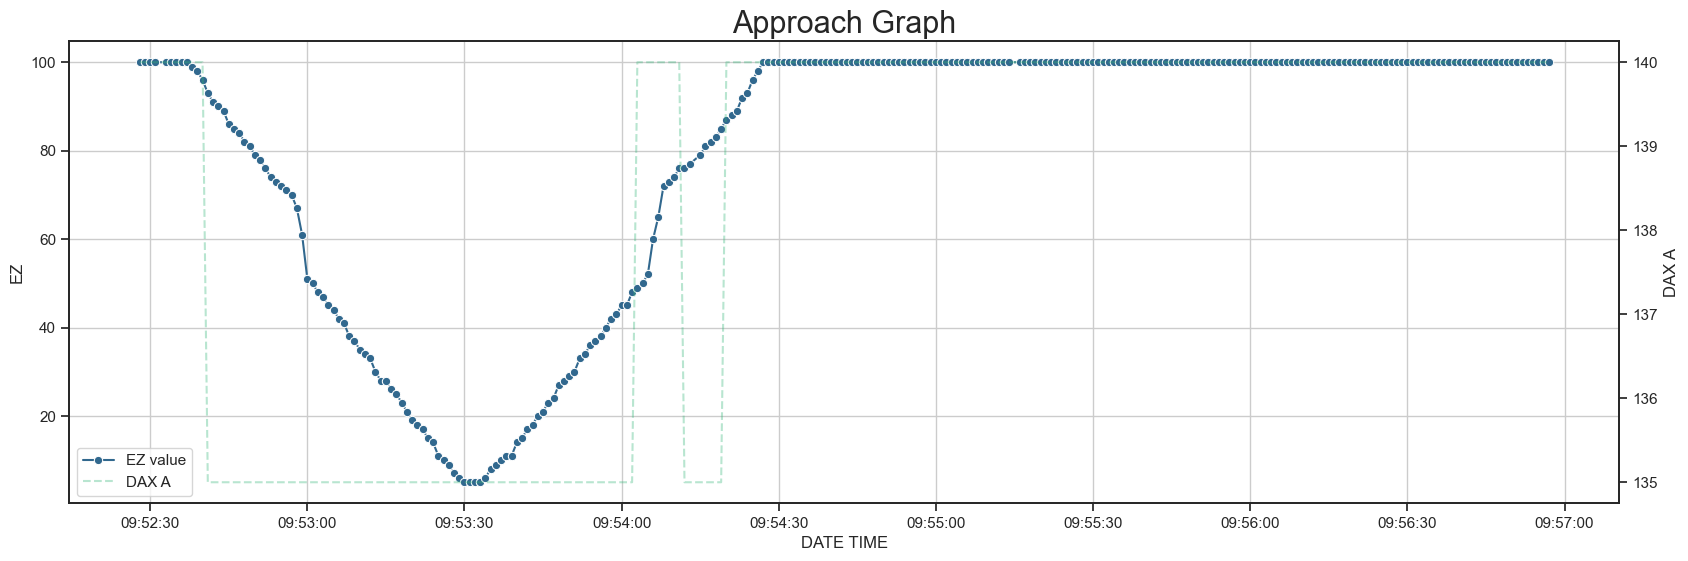

In [5]:
df_plot = df_data
# df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
# df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 17:45:0")]
# df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 17:25:0")]
df_plot = df_plot[df_plot['COUNT'] > 0]

plotApproachGraph(df_plot)


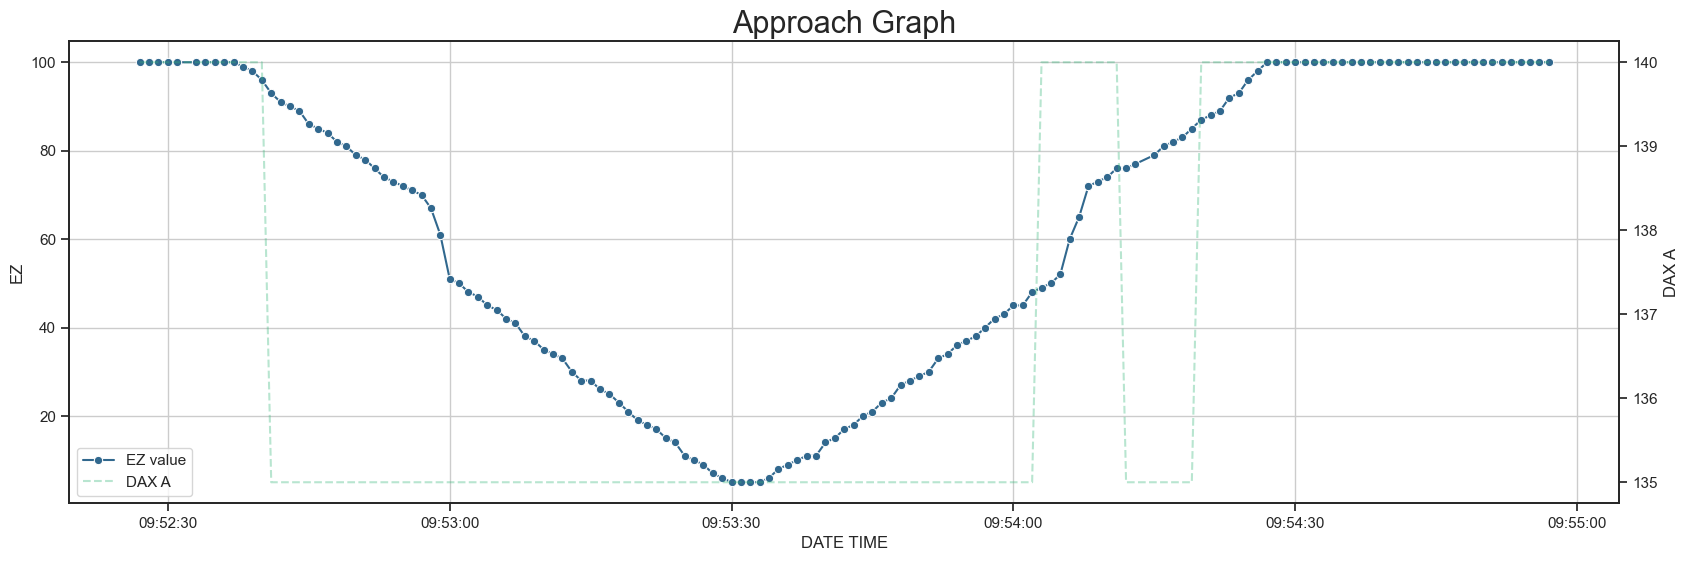

In [8]:
df_plot = df_data
# df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
# df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 17:45:0")]
# df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 17:25:0")]
df_plot = df_plot[df_plot['COUNT'] < 150]

plotApproachGraph(df_plot)
